# LUNG DISEASE DETECTION USING DEEP LEARNING ALGORITHMS

In [7]:
pip install numpy==1.21.1

     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     --------------------------------------- 0.0/10.3 MB 320.0 kB/s eta 0:00:32
     --------------------------------------- 0.1/10.3 MB 544.7 kB/s eta 0:00:19
      --------------------------------------- 0.2/10.3 MB 1.4 MB/s eta 0:00:08
     --- ------------------------------------ 0.8/10.3 MB 4.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.0/10.3 MB 8.1 MB/s eta 0:00:02
     ---------- ----------------------------- 2.6/10.3 MB 9.9 MB/s eta 0:00:01
     ------------ --------------------------- 3.2/10.3 MB 10.1 MB/s eta 0:00:01
     ------------ --------------------------- 3.2/10.3 MB 8.5 MB/s eta 0:00:01
     ----------------- ---------------------- 4.5/10.3 MB 10.7 MB/s eta 0:00:01
     ------------------- -------------------- 5.0/10.3 MB 10.5 MB/s eta 0:00:01
     --------------------- ------------------ 5.6/10.3 MB 10.9 MB/s eta 0:00:01
     ----------------------- ---------------- 6.0/10.

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [206 lines of output]
  setup.py:63: RuntimeWarning: NumPy 1.21.1 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\aksha\\anaconda3\\lib', 'C:\\', 'C:\\Users\\aksha\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
    libraries blis not found in ['C:\\Users\\a

## Import Liabraries

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np


In [2]:

# Define image size
img_size = 150

# Define labels
labels = ['PNEUMONIA', 'NORMAL']

# Define paths
train_dir = r"C:\Users\aksha\Desktop\chest_xray\train"
test_dir = r"C:\Users\aksha\Desktop\chest_xray\test"
val_dir = r"C:\Users\aksha\Desktop\chest_xray\val"


## Create Arrays of Images

In [4]:
# Function to load training data
def load_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

# Load training, test, and validation data
train = load_data(train_dir)
test = load_data(test_dir)
val = load_data(val_dir)


## Distribution Of Images


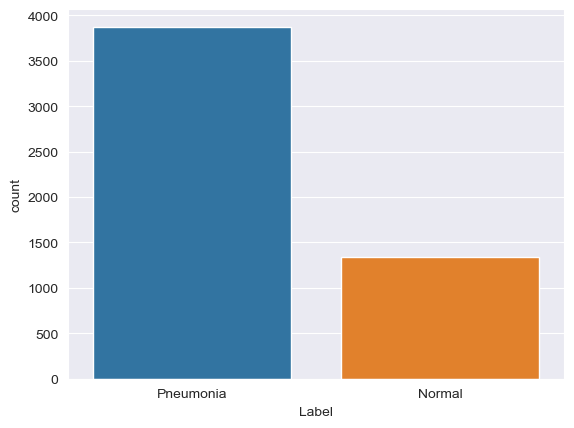

In [6]:
import pandas as pd

# Convert list to DataFrame
df = pd.DataFrame({'Label': l})

# Plot countplot using DataFrame
sns.countplot(data=df, x='Label')
plt.show()


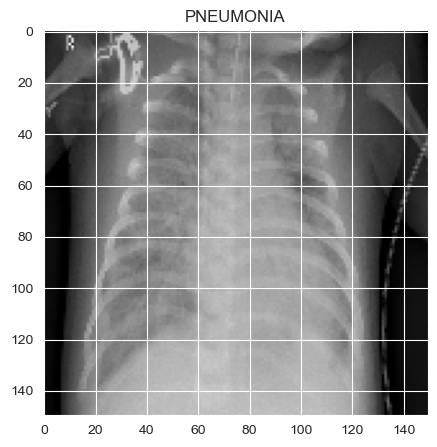

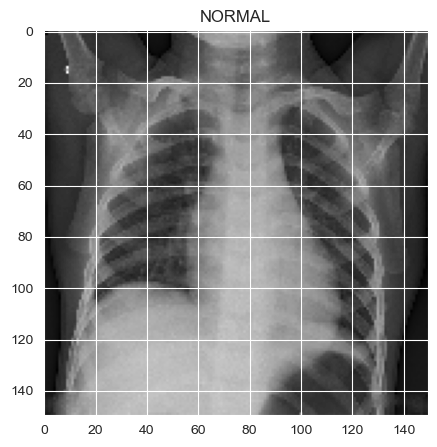

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])
plt.show()

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])
plt.show()

## Feature Extraction

In [8]:
# Splitting data into features and labels
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

## Normalization of Data 

In [9]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# Reshape data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


## Data Augmentation

In [10]:
datagen = ImageDataGenerator(
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=0.2,     # randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)  # randomly flip images horizontally

# Fit the data generator
datagen.fit(x_train)

## CNN Model

In [11]:
# CNN model
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (img_size, img_size, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

# Compile the model
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

# Summary of the model
model.summary()


C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [12]:
# Learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)

# Fitting the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=12,
                    validation_data=datagen.flow(x_val, y_val),
                    callbacks=[learning_rate_reduction])

Epoch 1/12


C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 401ms/step - accuracy: 0.8272 - loss: 0.7443 - val_accuracy: 0.5000 - val_loss: 31.6777 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 389ms/step - accuracy: 0.8978 - loss: 0.2741 - val_accuracy: 0.5000 - val_loss: 28.0755 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9197 - loss: 0.2323
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 389ms/step - accuracy: 0.9197 - loss: 0.2323 - val_accuracy: 0.5000 - val_loss: 15.0948 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 389ms/step - accuracy: 0.9485 - loss: 0.1451 - val_accuracy: 0.8750 - val_loss: 0.3591 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 388ms/step - accuracy: 0.9527 - loss: 0.1383 - val_accuracy: 0.7500 - val_loss: 0.4498 - learning_rate: 3.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.9484

In [13]:
# Evaluate the model
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1] * 100, "%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8830 - loss: 0.2743
Loss of the model is -  0.2754538953304291
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8830 - loss: 0.2743
Accuracy of the model is -  89.26281929016113 %


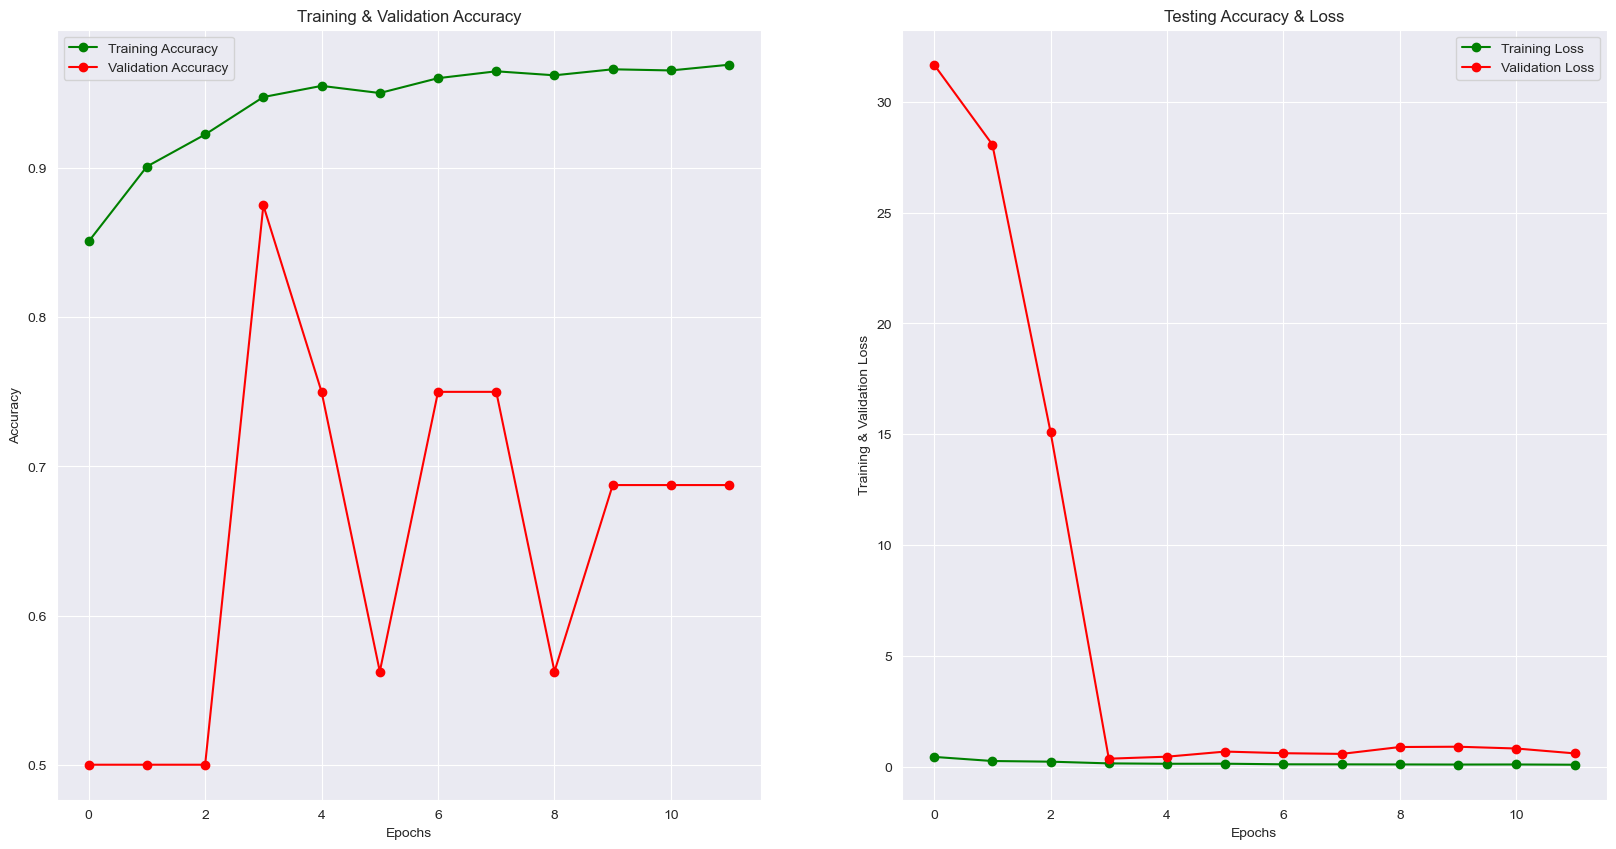

In [15]:
# Plotting accuracy and loss
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


In [17]:
# Classification report
predictions = model.predict(x_test)
predictions_classes = (predictions > 0.5).astype(int)
predictions_classes = predictions_classes.reshape(1, -1)[0]
print(classification_report(y_test, predictions_classes, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.88      0.91       390
   Normal (Class 1)       0.82      0.91      0.86       234

           accuracy                           0.89       624
          macro avg       0.88      0.90      0.89       624
       weighted avg       0.90      0.89      0.89       624



<Axes: >

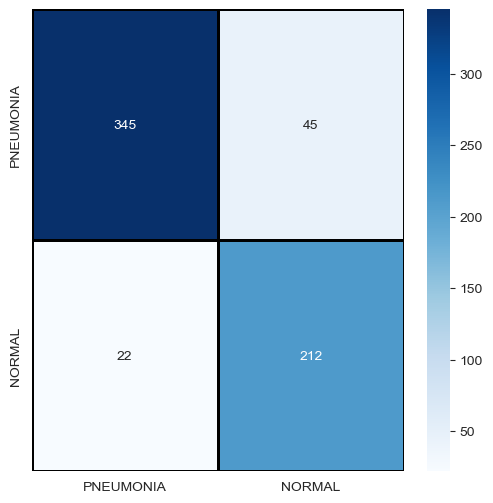

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions_classes)
cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)


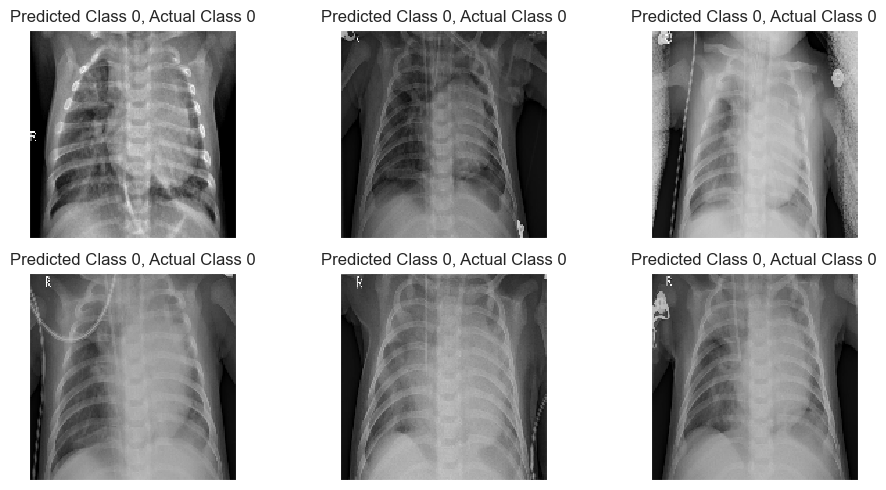

In [20]:
# Display correct and incorrect predictions
correct = np.nonzero(predictions_classes == y_test)[0]
incorrect = np.nonzero(predictions_classes != y_test)[0]

# Correct predictions
plt.figure(figsize=(10, 5))
for i, c in enumerate(correct[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes[c], y_test[c]))
plt.tight_layout()
plt.show()

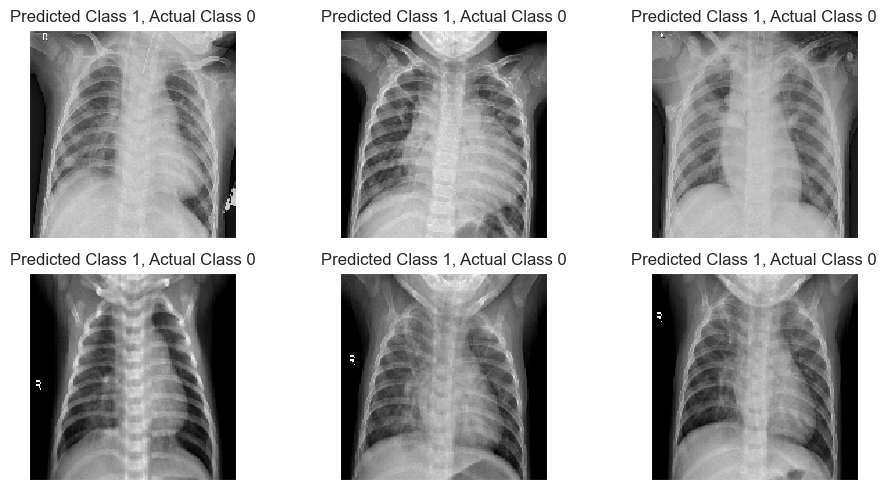

In [21]:
# Incorrect predictions
plt.figure(figsize=(10, 5))
for i, c in enumerate(incorrect[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes[c], y_test[c]))
plt.tight_layout()
plt.show()

In [22]:
# Save the model
model.save('C:/Users/aksha/Desktop/chest_xray/models/cnn_model.h5')

## DenseNet121 Model

In [23]:
from keras.models import load_model

# Load the previously saved CNN model
cnn_model = load_model('C:/Users/aksha/Desktop/chest_xray/models/cnn_model.h5')

# Summary of the loaded CNN model
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,403 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 2 (12.00 B)

In [24]:
# Convert the grayscale images to RGB for transfer learning
x_train_rgb = np.repeat(x_train, 3, -1)
x_val_rgb = np.repeat(x_val, 3, -1)
x_test_rgb = np.repeat(x_test, 3, -1)


In [26]:
# Load the DenseNet model without the top (fully connected) layers
from keras.applications import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


In [27]:

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [29]:
from keras.models import Model 
# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the transfer learning model
transfer_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the transfer learning model
transfer_model.summary()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 156, 156, 3)       │               0 │ input_layer_1[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 75, 75, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 75, 75, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 77, 77, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 38, 38, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 38, 38, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 38, 38, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 9,134,913 (34.85 MB)

 Trainable params: 2,097,409 (8.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [30]:
# Fit the transfer learning model
transfer_history = transfer_model.fit(datagen.flow(x_train_rgb, y_train, batch_size=32),
                                      epochs=12,
                                      validation_data=datagen.flow(x_val_rgb, y_val),
                                      callbacks=[learning_rate_reduction])


Epoch 1/12


C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 472ms/step - accuracy: 0.8029 - loss: 2.3065 - val_accuracy: 0.6875 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 451ms/step - accuracy: 0.8982 - loss: 0.2389 - val_accuracy: 0.5000 - val_loss: 1.5864 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 450ms/step - accuracy: 0.9194 - loss: 0.2019 - val_accuracy: 0.7500 - val_loss: 1.5590 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 448ms/step - accuracy: 0.9279 - loss: 0.1859 - val_accuracy: 0.6875 - val_loss: 0.5553 - learning_rate: 0.0010
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9319 - loss: 0.1759
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 450ms/step - accuracy: 0.9319 - loss: 0.1759 - val_accuracy: 0.6875 - val_loss: 0.8539 - learning_rate: 0.0010
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 449ms/step - accuracy: 0.9491 - loss: 0

In [31]:

# Evaluate the transfer learning model
print("Loss of the transfer learning model is - ", transfer_model.evaluate(x_test_rgb, y_test)[0])
print("Accuracy of the transfer learning model is - ", transfer_model.evaluate(x_test_rgb, y_test)[1] * 100, "%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 414ms/step - accuracy: 0.9374 - loss: 0.1879
Loss of the transfer learning model is -  0.3189128339290619
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step - accuracy: 0.9374 - loss: 0.1879
Accuracy of the transfer learning model is -  91.02563858032227 %


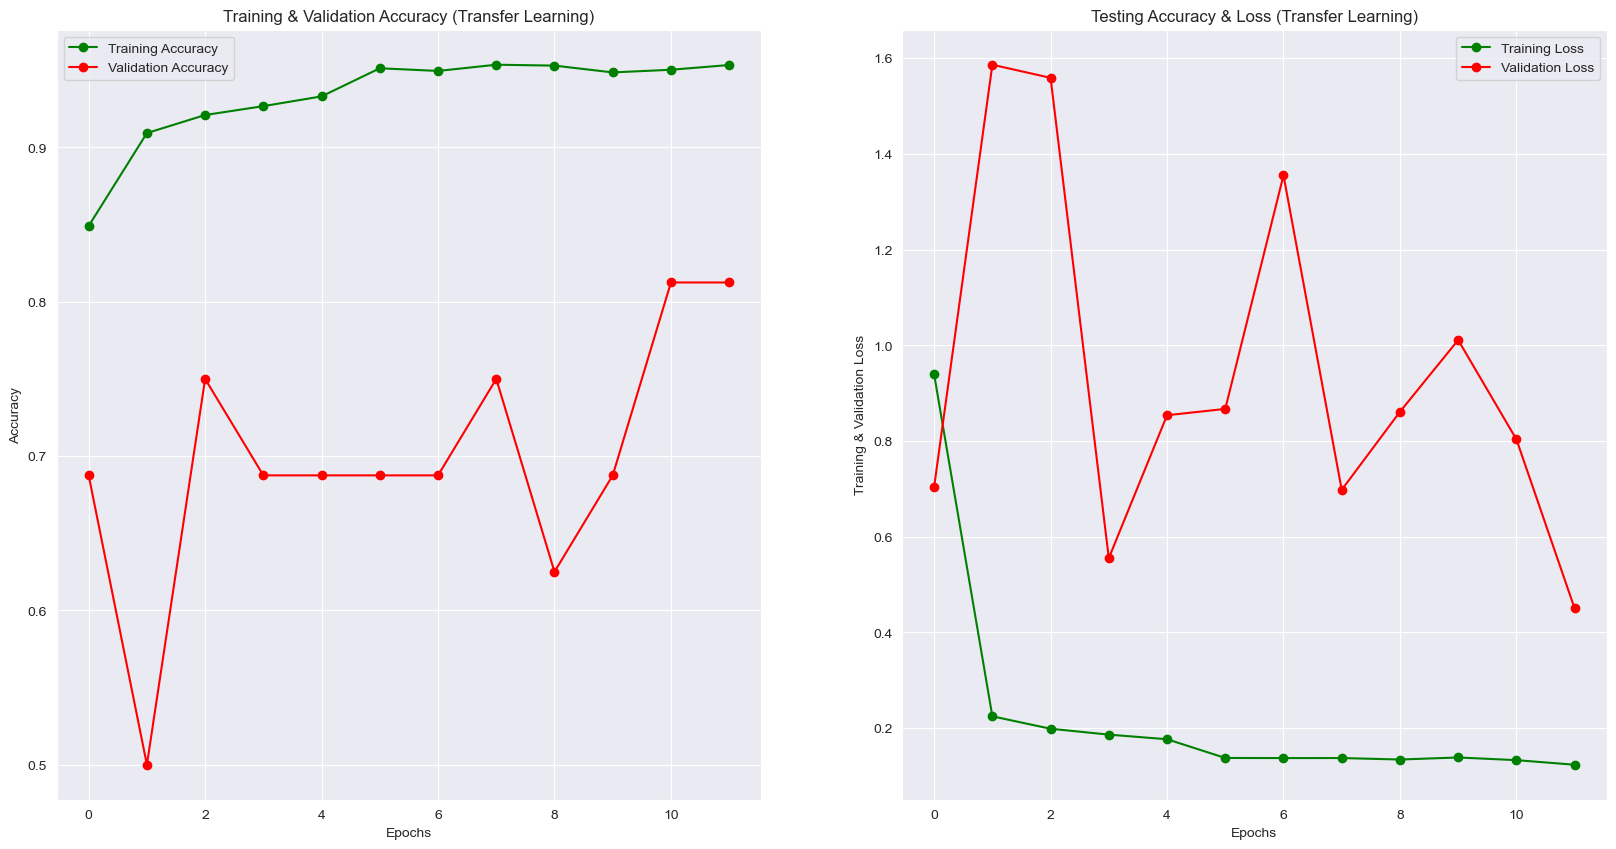

In [32]:
# Plotting accuracy and loss for transfer learning model
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = transfer_history.history['accuracy']
train_loss = transfer_history.history['loss']
val_acc = transfer_history.history['val_accuracy']
val_loss = transfer_history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy (Transfer Learning)')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss (Transfer Learning)')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [34]:
# Classification report for transfer learning model
predictions_transfer = transfer_model.predict(x_test_rgb)
predictions_classes_transfer = (predictions_transfer > 0.5).astype(int)
predictions_classes_transfer = predictions_classes_transfer.reshape(1, -1)[0]
print(classification_report(y_test, predictions_classes_transfer, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 414ms/step
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.91      0.95      0.93       390
   Normal (Class 1)       0.92      0.84      0.88       234

           accuracy                           0.91       624
          macro avg       0.91      0.90      0.90       624
       weighted avg       0.91      0.91      0.91       624



<Axes: >

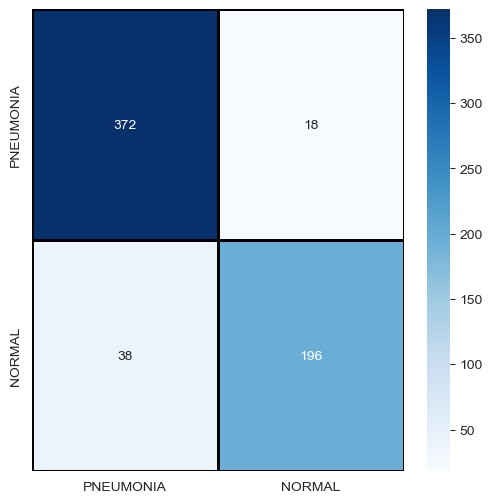

In [37]:

# Confusion matrix for transfer learning model
cm_transfer = confusion_matrix(y_test, predictions_classes_transfer)
cm_transfer = pd.DataFrame(cm_transfer, index=['0', '1'], columns=['0', '1'])
plt.figure(figsize=(6,6))
sns.heatmap(cm_transfer, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)


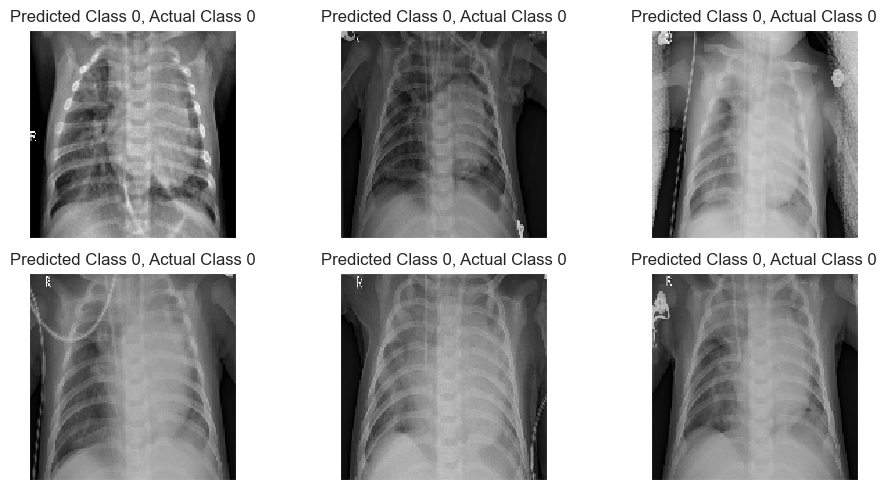

In [38]:

# Display correct and incorrect predictions for transfer learning model
correct_transfer = np.nonzero(predictions_classes_transfer == y_test)[0]
incorrect_transfer = np.nonzero(predictions_classes_transfer != y_test)[0]

# Correct predictions for transfer learning model
plt.figure(figsize=(10, 5))
for i, c in enumerate(correct_transfer[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_rgb[c].reshape(150, 150, 3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes_transfer[c], y_test[c]))
plt.tight_layout()
plt.show()


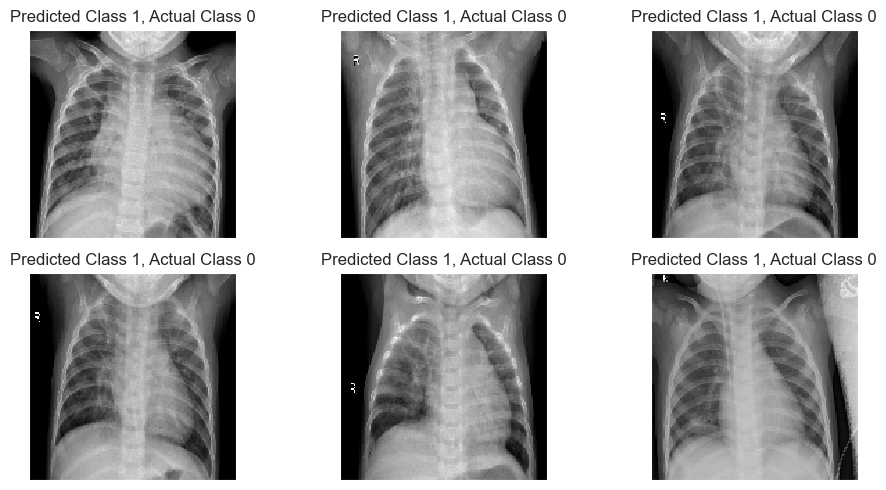

In [39]:

# Incorrect predictions for transfer learning model
plt.figure(figsize=(10, 5))
for i, c in enumerate(incorrect_transfer[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_rgb[c].reshape(150, 150, 3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes_transfer[c], y_test[c]))
plt.tight_layout()
plt.show()

In [40]:
# Save the transfer learning model
transfer_model.save('C:/Users/aksha/Desktop/chest_xray/models/densenet_model.h5')

## ResNet50 Model

In [41]:
from keras.applications import ResNet50

# Load the DenseNet transfer learning model
densenet_model = load_model('C:/Users/aksha/Desktop/chest_xray/models/densenet_model.h5')

# Summary of the loaded DenseNet transfer learning model
densenet_model.summary()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 156, 156, 3)       │               0 │ input_layer_1[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 75, 75, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 75, 75, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 77, 77, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 38, 38, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 38, 38, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 38, 38, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 9,134,915 (34.85 MB)

 Trainable params: 9,051,265 (34.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

 Optimizer params: 2 (12.00 B)

In [42]:
# Load the ResNet50 model without the top (fully connected) layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Add custom top layers for ResNet50
x = base_model_resnet.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions_resnet = Dense(1, activation='sigmoid')(x)

# Create the transfer learning model using ResNet50
transfer_model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [43]:
# Freeze the layers of the base ResNet50 model
for layer in base_model_resnet.layers:
    layer.trainable = False

# Compile the transfer learning model using ResNet50
transfer_model_resnet.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the transfer learning model using ResNet50
transfer_model_resnet.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 75, 75, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 75, 75, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 38, 38, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 38, 38, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 30,141,569 (114.98 MB)

 Trainable params: 6,553,857 (25.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [44]:
# Fit the transfer learning model using ResNet50
transfer_history_resnet = transfer_model_resnet.fit(datagen.flow(x_train_rgb, y_train, batch_size=32),
                                                    epochs=12,
                                                    validation_data=datagen.flow(x_val_rgb, y_val),
                                                    callbacks=[learning_rate_reduction])


Epoch 1/12


C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 513ms/step - accuracy: 0.7120 - loss: 0.9343 - val_accuracy: 0.5000 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 502ms/step - accuracy: 0.7436 - loss: 0.5110 - val_accuracy: 0.5000 - val_loss: 0.6298 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.7486 - loss: 0.4611
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 505ms/step - accuracy: 0.7486 - loss: 0.4611 - val_accuracy: 0.5000 - val_loss: 0.6665 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 505ms/step - accuracy: 0.7366 - loss: 0.4565 - val_accuracy: 0.5000 - val_loss: 0.7641 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.7435 - loss: 0.4245
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 503ms/step - accuracy: 0.7435 - loss:

In [45]:
# Evaluate the transfer learning model using ResNet50
print("Loss of the transfer learning model using ResNet50 is - ", transfer_model_resnet.evaluate(x_test_rgb, y_test)[0])
print("Accuracy of the transfer learning model using ResNet50 is - ", transfer_model_resnet.evaluate(x_test_rgb, y_test)[1] * 100, "%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step - accuracy: 0.8611 - loss: 0.2834
Loss of the transfer learning model using ResNet50 is -  0.4939710199832916
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 449ms/step - accuracy: 0.8611 - loss: 0.2834
Accuracy of the transfer learning model using ResNet50 is -  78.68589758872986 %


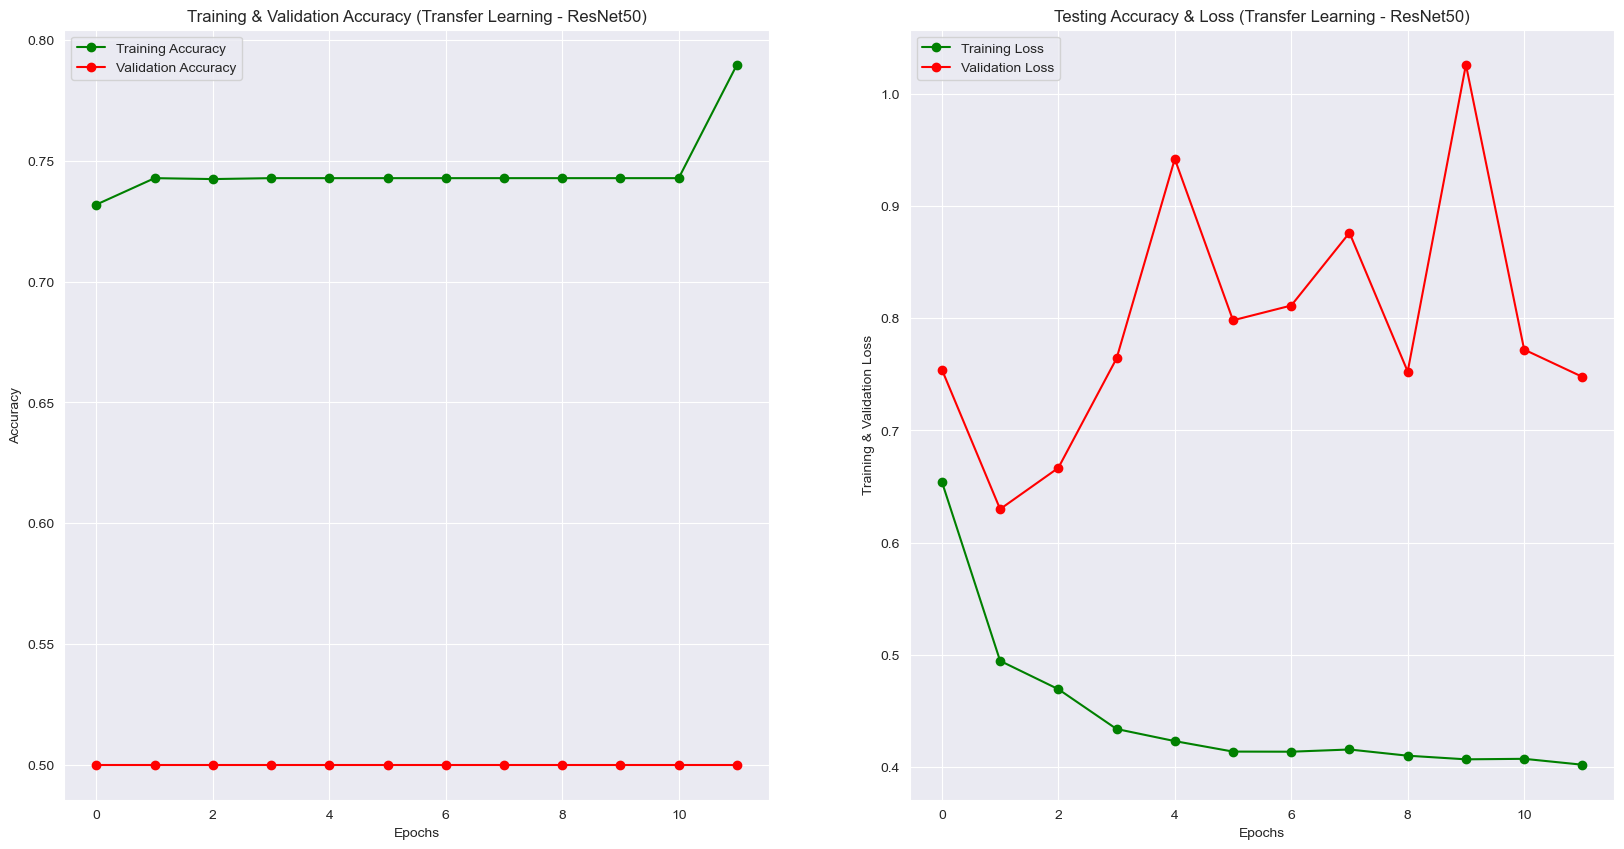

In [48]:
# Plotting accuracy and loss for transfer learning model using ResNet50
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = transfer_history_resnet.history['accuracy']
train_loss = transfer_history_resnet.history['loss']
val_acc = transfer_history_resnet.history['val_accuracy']
val_loss = transfer_history_resnet.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy (Transfer Learning - ResNet50)')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss (Transfer Learning - ResNet50)')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [49]:
# Classification report for transfer learning model using ResNet50
predictions_resnet = transfer_model_resnet.predict(x_test_rgb)
predictions_classes_resnet = (predictions_resnet > 0.5).astype(int)
predictions_classes_resnet = predictions_classes_resnet.reshape(1, -1)[0]
print(classification_report(y_test, predictions_classes_resnet, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step 
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.78      0.92      0.84       390
   Normal (Class 1)       0.80      0.57      0.67       234

           accuracy                           0.79       624
          macro avg       0.79      0.74      0.76       624
       weighted avg       0.79      0.79      0.78       624



<Axes: >

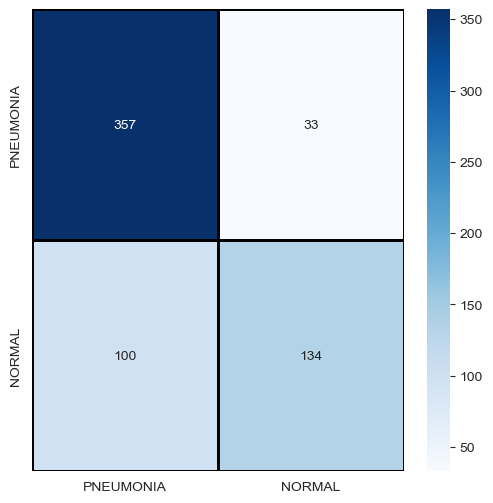

In [51]:
# Confusion matrix for transfer learning model using ResNet50
cm_resnet = confusion_matrix(y_test, predictions_classes_resnet)
cm_resnet = pd.DataFrame(cm_resnet, index=['0', '1'], columns=['0', '1'])
plt.figure(figsize=(6,6))
sns.heatmap(cm_resnet, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)

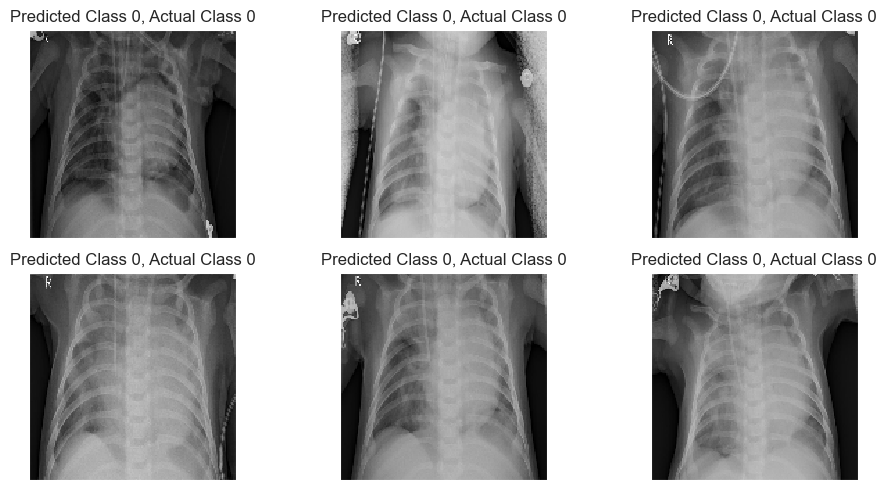

In [52]:
# Display correct and incorrect predictions for transfer learning model using ResNet50
correct_resnet = np.nonzero(predictions_classes_resnet == y_test)[0]
incorrect_resnet = np.nonzero(predictions_classes_resnet != y_test)[0]

# Correct predictions for transfer learning model using ResNet50
plt.figure(figsize=(10, 5))
for i, c in enumerate(correct_resnet[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_rgb[c].reshape(150, 150, 3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes_resnet[c], y_test[c]))
plt.tight_layout()
plt.show()

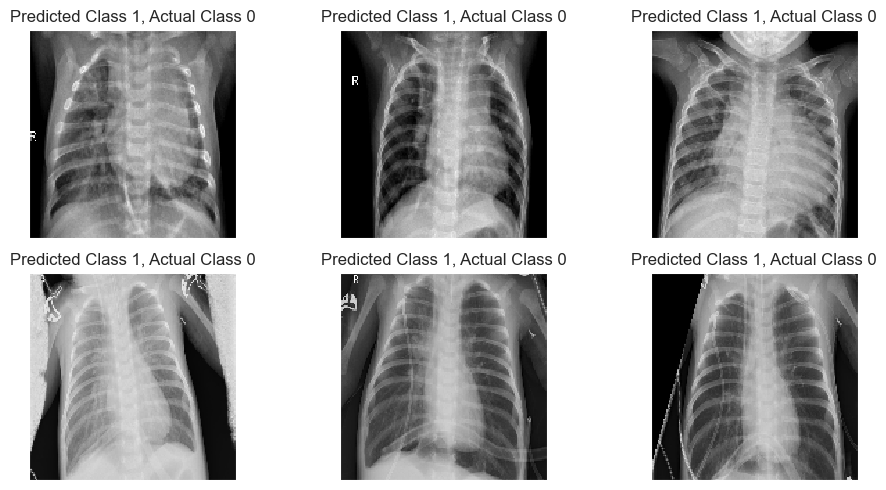

In [53]:
# Incorrect predictions for transfer learning model using ResNet50
plt.figure(figsize=(10, 5))
for i, c in enumerate(incorrect_resnet[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_rgb[c].reshape(150, 150, 3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes_resnet[c], y_test[c]))
plt.tight_layout()
plt.show()


In [54]:
# Save the model using ResNet50
transfer_model_resnet.save('C:/Users/aksha/Desktop/chest_xray/models/resnet_model.h5')

## InceptionV3

In [55]:
# Load the ResNet transfer learning model
resnet_model = load_model('C:/Users/aksha/Desktop/chest_xray/models/resnet_model.h5')

# Summary of the loaded ResNet transfer learning model
resnet_model.summary()

# Load the InceptionV3 model without the top (fully connected) layers
from keras.applications import InceptionV3

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 75, 75, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 75, 75, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 38, 38, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 38, 38, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 30,141,571 (114.98 MB)

 Trainable params: 30,088,449 (114.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 2 (12.00 B)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [56]:
# Add custom top layers for InceptionV3
x = base_model_inception.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions_inception = Dense(1, activation='sigmoid')(x)

# Create the transfer learning model using InceptionV3
transfer_model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

In [57]:
# Freeze the layers of the base InceptionV3 model
for layer in base_model_inception.layers:
    layer.trainable = False

# Compile the transfer learning model using InceptionV3
transfer_model_inception.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the transfer learning model using InceptionV3
transfer_model_inception.summary()


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 74, 74, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_5         │ (None, 74, 74, 32)        │              96 │ conv2d_5[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 74, 74, 32)        │               0 │ batch_normalization_5[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 72, 72, 32)        │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_6         │ (None, 72, 72, 32)        │              96 │ conv2d_6[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 72, 72, 32)        │               0 │ batch_normalization_6[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 72, 72, 64)        │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_7         │ (None, 72, 72, 64)        │             192 │ conv2d_7[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 72, 72, 64)        │               0 │ batch_normalization_7[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 35, 35, 64)        │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 35, 35, 80)        │           5,120 │ max_pooling2d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_8         │ (None, 35, 35, 80)        │             240 │ conv2d_8[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 35, 35, 80)        │               0 │ batch_normalization_8[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 33, 33, 192)       │         138,24

 Total params: 24,162,337 (92.17 MB)

 Trainable params: 2,359,553 (9.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [58]:

# Fit the transfer learning model using InceptionV3
transfer_history_inception = transfer_model_inception.fit(datagen.flow(x_train_rgb, y_train, batch_size=32),
                                                          epochs=12,
                                                          validation_data=datagen.flow(x_val_rgb, y_val),
                                                          callbacks=[learning_rate_reduction])


Epoch 1/12


C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 738ms/step - accuracy: 0.7760 - loss: 6.3590 - val_accuracy: 0.6875 - val_loss: 0.5726 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 690ms/step - accuracy: 0.8768 - loss: 0.3384 - val_accuracy: 0.6875 - val_loss: 1.7562 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 709ms/step - accuracy: 0.9051 - loss: 0.2362
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 712ms/step - accuracy: 0.9052 - loss: 0.2362 - val_accuracy: 0.6875 - val_loss: 0.6550 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 923ms/step - accuracy: 0.9287 - loss: 0.1825 - val_accuracy: 0.6250 - val_loss: 1.0037 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 707ms/step - accuracy: 0.9341 - loss: 0.1830 - val_accuracy: 0.8125 - val_loss: 0.6998 - learning_rate: 3.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 719ms/step - accuracy: 0.

In [59]:
# Evaluate the transfer learning model using InceptionV3
print("Loss of the transfer learning model using InceptionV3 is - ", transfer_model_inception.evaluate(x_test_rgb, y_test)[0])
print("Accuracy of the transfer learning model using InceptionV3 is - ", transfer_model_inception.evaluate(x_test_rgb, y_test)[1] * 100, "%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 521ms/step - accuracy: 0.9417 - loss: 0.1651
Loss of the transfer learning model using InceptionV3 is -  0.39106130599975586
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 524ms/step - accuracy: 0.9417 - loss: 0.1651
Accuracy of the transfer learning model using InceptionV3 is -  87.5 %


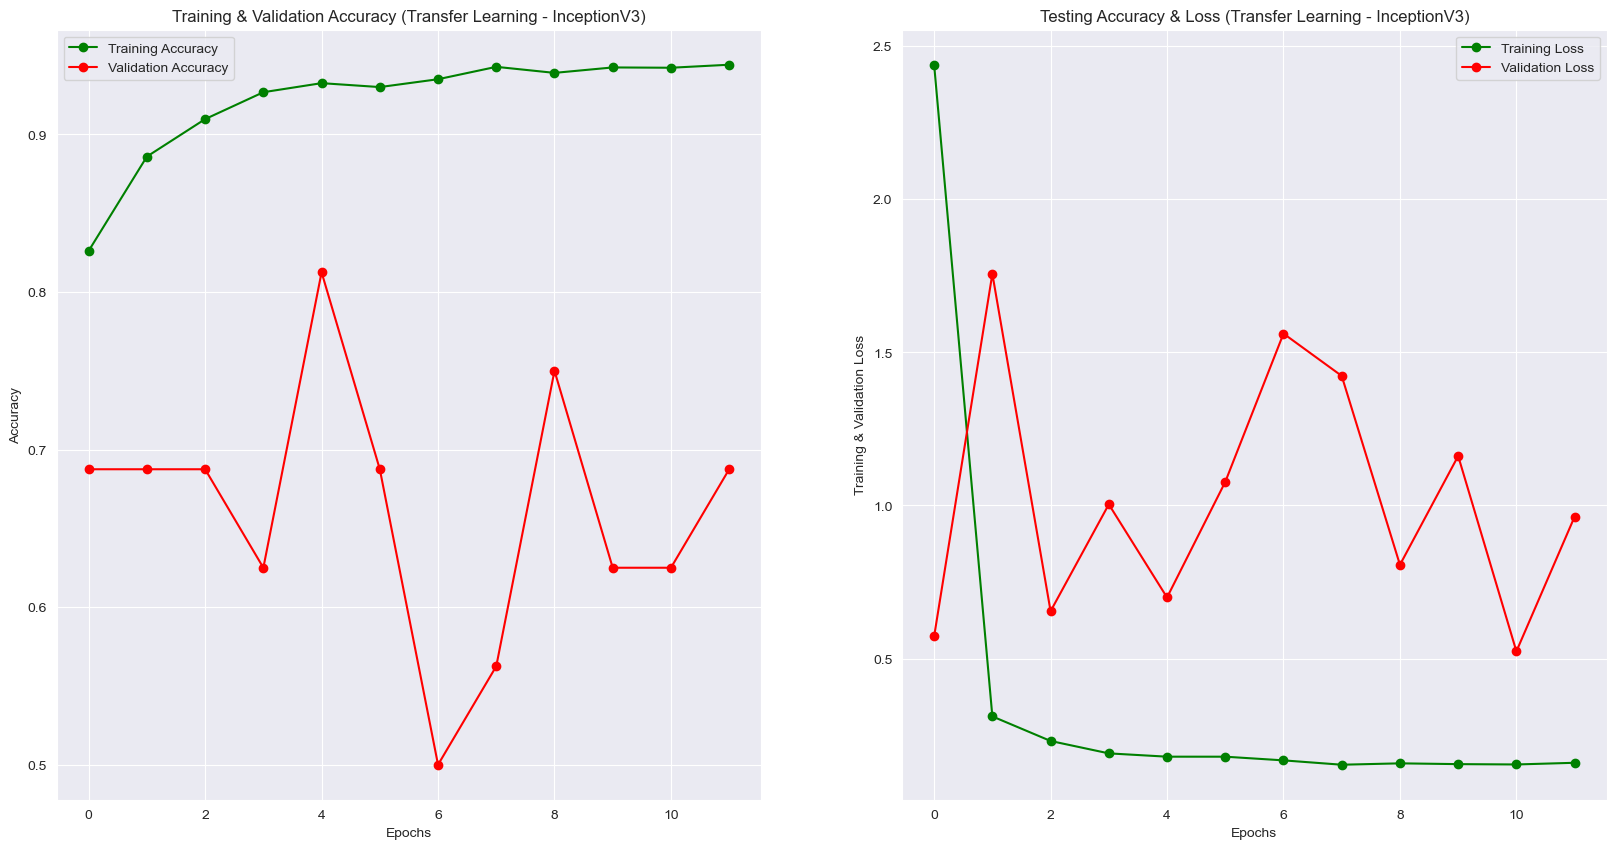

In [60]:
# Plotting accuracy and loss for transfer learning model using InceptionV3
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = transfer_history_inception.history['accuracy']
train_loss = transfer_history_inception.history['loss']
val_acc = transfer_history_inception.history['val_accuracy']
val_loss = transfer_history_inception.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy (Transfer Learning - InceptionV3)')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss (Transfer Learning - InceptionV3)')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [61]:
# Classification report for transfer learning model using InceptionV3
predictions_inception = transfer_model_inception.predict(x_test_rgb)
predictions_classes_inception = (predictions_inception > 0.5).astype(int)
predictions_classes_inception = predictions_classes_inception.reshape(1, -1)[0]
print(classification_report(y_test, predictions_classes_inception, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 784ms/step
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.85      0.97      0.91       390
   Normal (Class 1)       0.94      0.71      0.81       234

           accuracy                           0.88       624
          macro avg       0.89      0.84      0.86       624
       weighted avg       0.88      0.88      0.87       624



<Axes: >

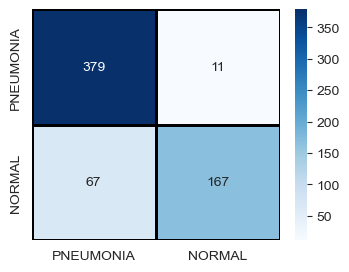

In [65]:
# Confusion matrix for transfer learning model using InceptionV3
cm_inception = confusion_matrix(y_test, predictions_classes_inception)
cm_inception = pd.DataFrame(cm_inception, index=['0', '1'], columns=['0', '1'])
plt.figure(figsize=(4,3))
sns.heatmap(cm_inception, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)


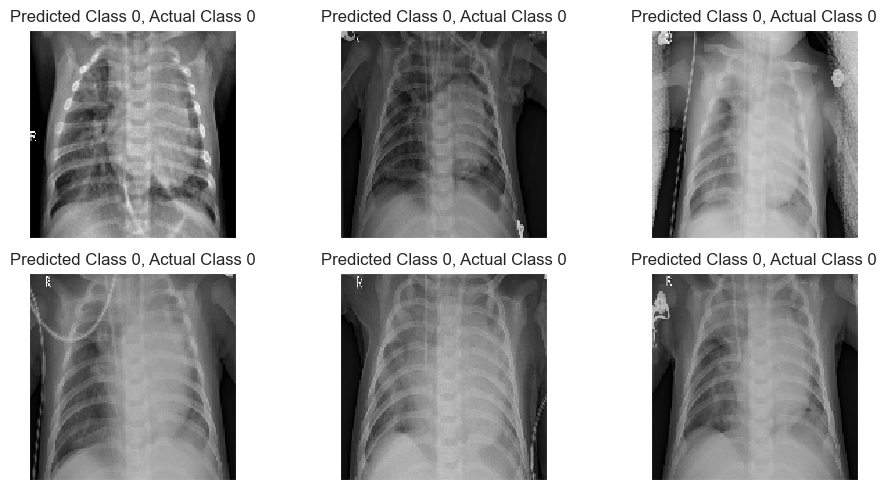

In [66]:
# Display correct and incorrect predictions for transfer learning model using InceptionV3
correct_inception = np.nonzero(predictions_classes_inception == y_test)[0]
incorrect_inception = np.nonzero(predictions_classes_inception != y_test)[0]

# Correct predictions for transfer learning model using InceptionV3
plt.figure(figsize=(10, 5))
for i, c in enumerate(correct_inception[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_rgb[c].reshape(150, 150, 3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes_inception[c], y_test[c]))
plt.tight_layout()
plt.show()

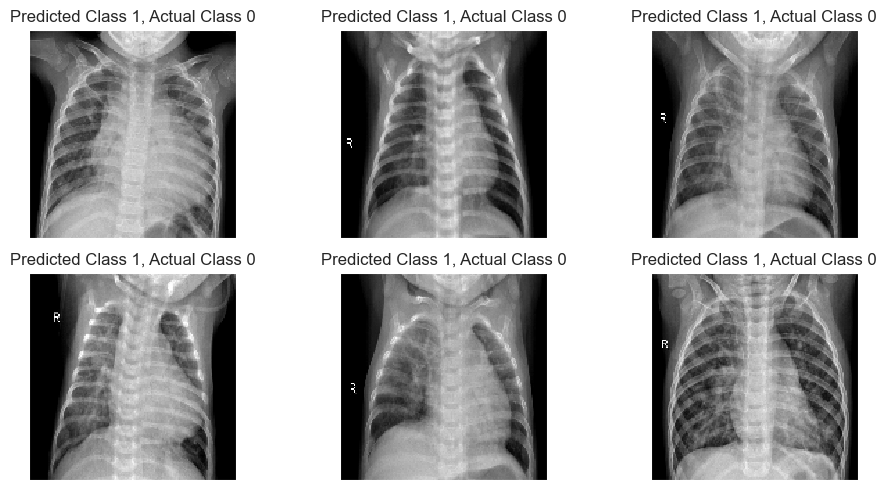

In [67]:
# Incorrect predictions for transfer learning model using InceptionV3
plt.figure(figsize=(10, 5))
for i, c in enumerate(incorrect_inception[:6]):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_rgb[c].reshape(150, 150, 3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions_classes_inception[c], y_test[c]))
plt.tight_layout()
lt.show()

In [68]:
# Save the model using InceptionV3
transfer_model_inception.save('C:/Users/aksha/Desktop/chest_xray/models/inception_model.h5')

## Accuracy Comparison

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8830 - loss: 0.2743
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 852ms/step - accuracy: 0.9374 - loss: 0.1879
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 974ms/step - accuracy: 0.8611 - loss: 0.2834
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 519ms/step - accuracy: 0.9417 - loss: 0.1651
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 741ms/step


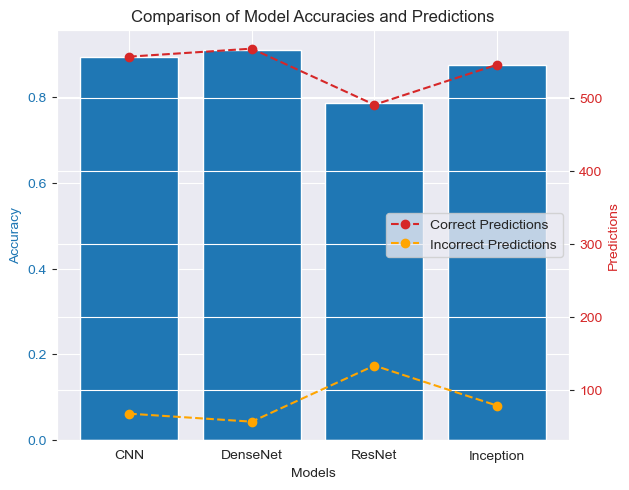

In [72]:
# Load the required models
from keras.models import load_model

# Load the saved models
cnn_model = load_model('C:/Users/aksha/Desktop/chest_xray/models/cnn_model.h5')
densenet_model = load_model('C:/Users/aksha/Desktop/chest_xray/models/densenet_model.h5')
resnet_model = load_model('C:/Users/aksha/Desktop/chest_xray/models/resnet_model.h5')
inception_model = load_model('C:/Users/aksha/Desktop/chest_xray/models/inception_model.h5')

# Evaluate the models on the test set
cnn_accuracy = cnn_model.evaluate(x_test, y_test)[1]
densenet_accuracy = densenet_model.evaluate(x_test_rgb, y_test)[1]
resnet_accuracy = resnet_model.evaluate(x_test_rgb, y_test)[1]
inception_accuracy = inception_model.evaluate(x_test_rgb, y_test)[1]

# Count predictions for each model
def count_predictions(model, x_data, y_data):
    predictions = model.predict(x_data)
    predictions_classes = (predictions > 0.5).astype(int).reshape(-1)
    correct_count = np.sum(predictions_classes == y_data)
    incorrect_count = len(y_data) - correct_count
    return correct_count, incorrect_count

cnn_correct, cnn_incorrect = count_predictions(cnn_model, x_test, y_test)
densenet_correct, densenet_incorrect = count_predictions(densenet_model, x_test_rgb, y_test)
resnet_correct, resnet_incorrect = count_predictions(resnet_model, x_test_rgb, y_test)
inception_correct, inception_incorrect = count_predictions(inception_model, x_test_rgb, y_test)

# Plotting the accuracies along with correct and incorrect predictions in a bar graph
import matplotlib.pyplot as plt

models = ['CNN', 'DenseNet', 'ResNet', 'Inception']
accuracies = [cnn_accuracy, densenet_accuracy, resnet_accuracy, inception_accuracy]
correct_predictions = [cnn_correct, densenet_correct, resnet_correct, inception_correct]
incorrect_predictions = [cnn_incorrect, densenet_incorrect, resnet_incorrect, inception_incorrect]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(models, accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Predictions', color=color)  
ax2.plot(models, correct_predictions, color=color, linestyle='dashed', marker='o', label='Correct Predictions')
ax2.plot(models, incorrect_predictions, color='orange', linestyle='dashed', marker='o', label='Incorrect Predictions')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Comparison of Model Accuracies and Predictions')
plt.legend()
plt.show()
